In [1]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.style as stl
stl.use('dark_background')

In [2]:
ff1.Cache.enable_cache('/Users/javi/Library/Caches')

In [3]:
pd.options.mode.chained_assignment = None

In [ ]:
schedule = ff1.get_event_schedule(2021)
schedule2 = schedule['RoundNumber'].drop(0)
list = []
for val in schedule2:
    # print(val)
    race = ff1.get_session(2021, val, 'R')
    race.load()
    race = race.results
    df = race[['TeamName', 'Position']].groupby(['TeamName']).mean().sort_values(['Position'])
    print(df)
    list.append(df)
list

In [164]:
race = ff1.get_session(2021, 1, 'R')
race.load()
race = race.results

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']


In [165]:
race

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
44,44,L HAMILTON,HAM,Mercedes,00D2BE,Lewis,Hamilton,Lewis Hamilton,1.0,2.0,NaT,NaT,NaT,0 days 01:32:03.897000,Finished,25.0
33,33,M VERSTAPPEN,VER,Red Bull Racing,0600EF,Max,Verstappen,Max Verstappen,2.0,1.0,NaT,NaT,NaT,0 days 01:32:04.642000,Finished,18.0
77,77,V BOTTAS,BOT,Mercedes,00D2BE,Valtteri,Bottas,Valtteri Bottas,3.0,3.0,NaT,NaT,NaT,0 days 01:32:41.280000,Finished,16.0
4,4,L NORRIS,NOR,McLaren,FF9800,Lando,Norris,Lando Norris,4.0,7.0,NaT,NaT,NaT,0 days 01:32:50.363000,Finished,12.0
11,11,S PEREZ,PER,Red Bull Racing,0600EF,Sergio,Perez,Sergio Perez,5.0,0.0,NaT,NaT,NaT,0 days 01:32:55.944000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,DC0004,Charles,Leclerc,Charles Leclerc,6.0,4.0,NaT,NaT,NaT,0 days 01:33:02.987000,Finished,8.0
3,3,D RICCIARDO,RIC,McLaren,FF9800,Daniel,Ricciardo,Daniel Ricciardo,7.0,6.0,NaT,NaT,NaT,0 days 01:33:09.901000,Finished,6.0
55,55,C SAINZ,SAI,Ferrari,DC0004,Carlos,Sainz,Carlos Sainz,8.0,8.0,NaT,NaT,NaT,0 days 01:33:10.997000,Finished,4.0
22,22,Y TSUNODA,TSU,AlphaTauri,2B4562,Yuki,Tsunoda,Yuki Tsunoda,9.0,13.0,NaT,NaT,NaT,0 days 01:33:29.589000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,006F62,Lance,Stroll,Lance Stroll,10.0,10.0,NaT,NaT,NaT,0 days 01:33:30.610000,Finished,1.0


In [96]:
for val in list[3].index:
        print(val)

Mercedes
Red Bull Racing
Ferrari
McLaren
Aston Martin
Alpine
Alfa Romeo Racing
AlphaTauri
Williams
Haas F1 Team


ValueError: If using all scalar values, you must pass an index

In [128]:
list[3]

,Position
TeamName,
Mercedes,2.0
Red Bull Racing,3.5
Ferrari,5.5
McLaren,7.0
Aston Martin,12.0
Alpine,13.0
Alfa Romeo Racing,13.5
AlphaTauri,15.0
Williams,15.0


In [130]:
merc = []
rbr = []
ferrari = []
mclaren = []
alpine = []
at = []
am = []
williams = []
alfa =[]
haas = []
team_list = [merc, rbr, ferrari, mclaren, alpine, at, am, williams, alfa, haas]
teams = ['Mercedes', 'Red Bull Racing', 'Ferrari', 'McLaren', 'Alpine', 'AlphaTauri', 'Aston Martin', 'Williams', 'Alfa Romeo Racing', 'Haas F1 Team']
dict = {'Mercedes': merc, 'Red Bull Racing': rbr, 'Ferrari': ferrari, 'McLaren': mclaren, 'Alpine':alpine, 'AlphaTauri': at, 'Aston Martin': am, 'Williams': williams, 'Alfa Romeo Racing': alfa, 'Haas F1 Team': haas}

In [127]:
list[3]['Position']['Mercedes']

2.0

In [131]:
for team in teams:
    for l in list:
        dict[team].append(l['Position'][team])



In [134]:
df = pd.DataFrame({'Mercedes': merc, 'Red Bull Racing': rbr, 'Ferrari': ferrari, 'McLaren': mclaren, 'Alpine':alpine, 'AlphaTauri': at, 'Aston Martin': am, 'Williams': williams, 'Alfa Romeo Racing': alfa, 'Haas F1 Team': haas})

In [135]:
df.head()

,Mercedes,Red Bull Racing,Ferrari,McLaren,Alpine,AlphaTauri,Aston Martin,Williams,Alfa Romeo Racing,Haas F1 Team
0,2.0,3.5,7.0,5.5,16.0,13.0,12.5,16.0,11.5,18.0
1,10.0,6.0,4.5,4.5,9.5,9.5,11.5,19.5,13.5,16.5
2,2.0,3.0,8.5,7.0,7.5,12.5,13.5,17.0,16.0,18.0
3,2.0,3.5,5.5,7.0,13.0,15.0,12.0,15.0,13.5,18.5
4,13.0,2.5,11.0,7.5,11.0,11.0,6.5,14.5,10.5,17.5


In [136]:
df["Race"] = np.nan

In [144]:
count = 1
for val in df.index:
    df['Race'][val] = count
    count += 1

df['Race'] = df['Race'].astype(int)

In [145]:
df

,Mercedes,Red Bull Racing,Ferrari,McLaren,Alpine,AlphaTauri,Aston Martin,Williams,Alfa Romeo Racing,Haas F1 Team,Race
0,2.0,3.5,7.0,5.5,16.0,13.0,12.5,16.0,11.5,18.0,1
1,10.0,6.0,4.5,4.5,9.5,9.5,11.5,19.5,13.5,16.5,2
2,2.0,3.0,8.5,7.0,7.5,12.5,13.5,17.0,16.0,18.0,3
3,2.0,3.5,5.5,7.0,13.0,15.0,12.0,15.0,13.5,18.5,4
4,13.0,2.5,11.0,7.5,11.0,11.0,6.5,14.5,10.5,17.5,5
5,13.5,9.5,6.0,7.0,13.0,5.0,10.5,16.5,10.5,13.5,6
6,3.0,2.0,13.5,5.5,11.0,10.0,9.5,15.0,16.0,19.5,7
7,2.5,2.5,6.5,9.0,11.5,15.0,10.0,18.0,13.0,17.0,8
8,3.0,3.5,6.5,5.0,15.0,10.5,15.0,13.5,14.5,18.5,9
9,2.0,18.0,4.0,4.5,8.0,10.5,13.5,13.0,14.0,17.5,10


In [169]:
colors = {'Mercedes': '#00D2BE', 'Red Bull Racing': '#0600EF', 'Ferrari': '#DC0004', 'McLaren': '#FF9800', 'Alpine': '#0090FF', 'AlphaTauri': '#2B4562', 'Aston Martin': '#006F62', 'Williams': '#005AFF', 'Alfa Romeo Racing': '#900000', 'Haas F1 Team': '#FFFFFF'}

In [ ]:
df = df.drop('')

legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
legend      WARNING 	No artists with labels found to put in legend.  Note that artists whose label start with 

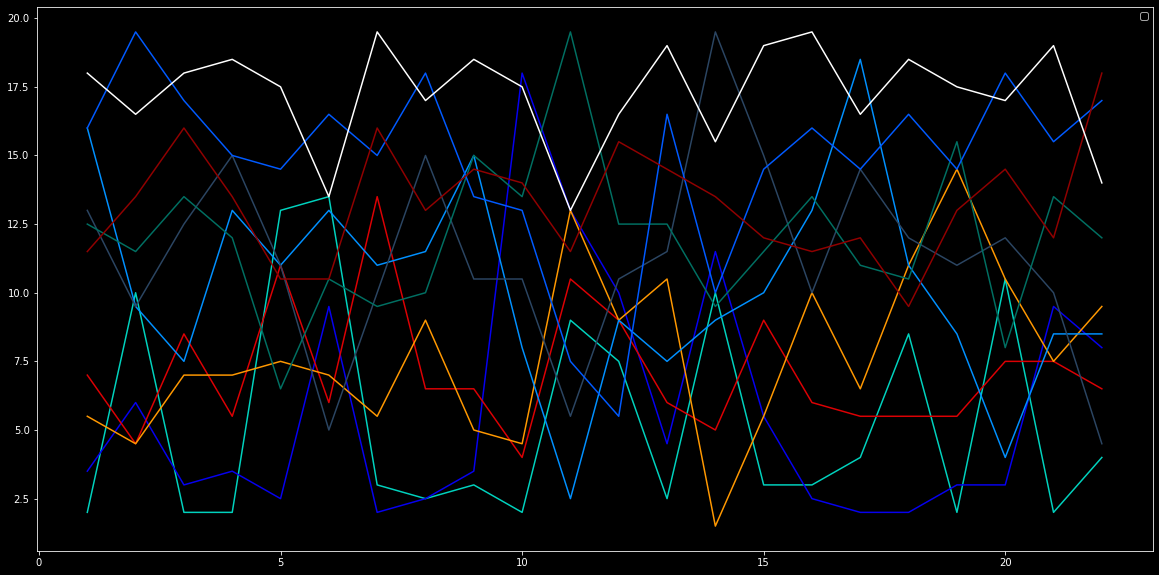

In [170]:
plt.figure(figsize=(20,10))
for team in teams:
    plt.plot(df['Race'], df[team], color = colors[team])
    plt.legend()




In [133]:
merc

[2.0,
 10.0,
 2.0,
 2.0,
 13.0,
 13.5,
 3.0,
 2.5,
 3.0,
 2.0,
 9.0,
 7.5,
 2.5,
 10.0,
 3.0,
 3.0,
 4.0,
 8.5,
 2.0,
 10.5,
 2.0,
 4.0]

In [107]:
merc = []
rbr = []
ferrari = []
mclaren = []
alpine = []
at = []
am = []
williams = []
alfa =[]
haas = []
teams = [merc, rbr, ferrari, mclaren, alpine, at, am, williams, alfa, haas]

# for team in teams:
#     # print(l)
#     for val in list:
#         print(type(val))
# for val in list:
#     print(type(val))

# test = pd.DataFrame(list)
for l in list:
    l['Position']

ValueError: The truth value of a SessionResults is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [59]:
race3 = race2.results
race3

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
44,44,L HAMILTON,HAM,Mercedes,00D2BE,Lewis,Hamilton,Lewis Hamilton,1.0,2.0,NaT,NaT,NaT,0 days 01:32:03.897000,Finished,25.0
33,33,M VERSTAPPEN,VER,Red Bull Racing,0600EF,Max,Verstappen,Max Verstappen,2.0,1.0,NaT,NaT,NaT,0 days 01:32:04.642000,Finished,18.0
77,77,V BOTTAS,BOT,Mercedes,00D2BE,Valtteri,Bottas,Valtteri Bottas,3.0,3.0,NaT,NaT,NaT,0 days 01:32:41.280000,Finished,16.0
4,4,L NORRIS,NOR,McLaren,FF9800,Lando,Norris,Lando Norris,4.0,7.0,NaT,NaT,NaT,0 days 01:32:50.363000,Finished,12.0
11,11,S PEREZ,PER,Red Bull Racing,0600EF,Sergio,Perez,Sergio Perez,5.0,0.0,NaT,NaT,NaT,0 days 01:32:55.944000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,DC0004,Charles,Leclerc,Charles Leclerc,6.0,4.0,NaT,NaT,NaT,0 days 01:33:02.987000,Finished,8.0
3,3,D RICCIARDO,RIC,McLaren,FF9800,Daniel,Ricciardo,Daniel Ricciardo,7.0,6.0,NaT,NaT,NaT,0 days 01:33:09.901000,Finished,6.0
55,55,C SAINZ,SAI,Ferrari,DC0004,Carlos,Sainz,Carlos Sainz,8.0,8.0,NaT,NaT,NaT,0 days 01:33:10.997000,Finished,4.0
22,22,Y TSUNODA,TSU,AlphaTauri,2B4562,Yuki,Tsunoda,Yuki Tsunoda,9.0,13.0,NaT,NaT,NaT,0 days 01:33:29.589000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,006F62,Lance,Stroll,Lance Stroll,10.0,10.0,NaT,NaT,NaT,0 days 01:33:30.610000,Finished,1.0


In [64]:
df = race3[['TeamName', 'Position']].groupby(['TeamName']).mean().sort_values(['TeamName', 'Position'])
df

,Position
TeamName,
Alfa Romeo Racing,11.5
AlphaTauri,13.0
Alpine,16.0
Aston Martin,12.5
Ferrari,7.0
Haas F1 Team,18.0
McLaren,5.5
Mercedes,2.0
Red Bull Racing,3.5


In [39]:
event = ff1.get_event(2021, 1)
event

RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021
EventDate                                   2021-03-28 00:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2021-03-26 00:00:00
Session2                                             Practice 2
Session2Date                                2021-03-26 00:00:00
Session3                                             Practice 3
Session3Date                                2021-03-27 00:00:00
Session4                                             Qualifying
Session4Date                                2021-03-27 00:00:00
Session5                                

In [23]:
race = ff1.get_session(2022, 1, 'R')
laps = race.load_laps(with_telemetry=True)
laps = laps.loc[laps['LapNumber'] == 57]
# df = laps[['Team', 'LapTime']].groupby(['Team']).mean().sort_values(['Team', 'LapTime'])
# df
laps


/usr/local/lib/python3.9/site-packages/fastf1/core.py:1093: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
56,0 days 02:40:08.746000,16,0 days 00:01:36.373000,57,4,NaT,NaT,0 days 00:00:30.927000,0 days 00:00:41.677000,0 days 00:00:23.769000,...,294.0,SOFT,14.0,False,0 days 02:38:32.373000,Ferrari,LEC,1,True,2022-03-20 16:39:32.390
113,0 days 02:40:14.299000,55,0 days 00:01:36.269000,57,4,NaT,NaT,0 days 00:00:30.890000,0 days 00:00:41.561000,0 days 00:00:23.818000,...,NaN,SOFT,16.0,False,0 days 02:38:38.030000,Ferrari,SAI,1,True,2022-03-20 16:39:38.047
170,0 days 02:40:18.398000,44,0 days 00:01:36.918000,57,4,NaT,NaT,0 days 00:00:31.382000,0 days 00:00:41.762000,0 days 00:00:23.774000,...,NaN,SOFT,16.0,False,0 days 02:38:41.480000,Mercedes,HAM,1,True,2022-03-20 16:39:41.497
227,0 days 02:40:19.956000,63,0 days 00:01:37.401000,57,4,NaT,NaT,0 days 00:00:31.737000,0 days 00:00:41.929000,0 days 00:00:23.735000,...,NaN,SOFT,14.0,False,0 days 02:38:42.555000,Mercedes,RUS,1,True,2022-03-20 16:39:42.572
284,0 days 02:40:23.508000,20,0 days 00:01:37.741000,57,4,NaT,NaT,0 days 00:00:31.338000,0 days 00:00:42.474000,0 days 00:00:23.929000,...,296.0,SOFT,14.0,False,0 days 02:38:45.767000,Haas F1 Team,MAG,1,True,2022-03-20 16:39:45.784
341,0 days 02:40:24.829000,77,0 days 00:01:37.870000,57,4,NaT,NaT,0 days 00:00:31.430000,0 days 00:00:42.479000,0 days 00:00:23.961000,...,301.0,SOFT,14.0,False,0 days 02:38:46.959000,Alfa Romeo,BOT,1,True,2022-03-20 16:39:46.976
398,0 days 02:40:28.139000,31,0 days 00:01:38.676000,57,4,NaT,NaT,0 days 00:00:31.981000,0 days 00:00:42.512000,0 days 00:00:24.183000,...,301.0,SOFT,17.0,False,0 days 02:38:49.463000,Alpine,OCO,1,True,2022-03-20 16:39:49.480
455,0 days 02:40:29.079000,22,0 days 00:01:38.891000,57,4,NaT,NaT,0 days 00:00:31.960000,0 days 00:00:42.692000,0 days 00:00:24.239000,...,316.0,SOFT,16.0,False,0 days 02:38:50.188000,AlphaTauri,TSU,1,True,2022-03-20 16:39:50.205
512,0 days 02:40:31.102000,14,0 days 00:01:38.986000,57,4,NaT,NaT,0 days 00:00:32.243000,0 days 00:00:42.566000,0 days 00:00:24.177000,...,281.0,SOFT,15.0,True,0 days 02:38:52.116000,Alpine,ALO,1,True,2022-03-20 16:39:52.133
569,0 days 02:40:31.815000,24,0 days 00:01:38.941000,57,4,NaT,NaT,0 days 00:00:31.915000,0 days 00:00:42.884000,0 days 00:00:24.142000,...,315.0,SOFT,15.0,False,0 days 02:38:52.874000,Alfa Romeo,ZHO,1,True,2022-03-20 16:39:52.891


In [8]:
laps2 = laps.loc[laps['IsAccurate'] == True]

In [10]:
df = laps2[['Team', 'LapTime']].groupby(['Team']).mean().sort_values(['Team', 'LapTime'])
df

,LapTime
Team,
Alfa Romeo,0 days 00:01:39.456833333
AlphaTauri,0 days 00:01:39.480987951
Alpine,0 days 00:01:39.425174418
Aston Martin,0 days 00:01:40.690477272
Ferrari,0 days 00:01:37.826922222
Haas F1 Team,0 days 00:01:39.610166666
McLaren,0 days 00:01:40.727636363
Mercedes,0 days 00:01:38.500258426
Red Bull Racing,0 days 00:01:38.035543209
